In [2]:
#Minst data set basic approach
import tensorflow as tf

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("C:\\Users\\rhasan\\Downloads\\Tensorflow-Bootcamp\\03-Convolutional-Neural-Networks\\MNIST_data", one_hot=True)

Extracting C:\Users\rhasan\Downloads\Tensorflow-Bootcamp\03-Convolutional-Neural-Networks\MNIST_data\train-images-idx3-ubyte.gz
Extracting C:\Users\rhasan\Downloads\Tensorflow-Bootcamp\03-Convolutional-Neural-Networks\MNIST_data\train-labels-idx1-ubyte.gz
Extracting C:\Users\rhasan\Downloads\Tensorflow-Bootcamp\03-Convolutional-Neural-Networks\MNIST_data\t10k-images-idx3-ubyte.gz
Extracting C:\Users\rhasan\Downloads\Tensorflow-Bootcamp\03-Convolutional-Neural-Networks\MNIST_data\t10k-labels-idx1-ubyte.gz


In [6]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [7]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [8]:
mnist.train.num_examples

55000

In [9]:
mnist.test.num_examples

10000

In [10]:
mnist.validation.num_examples

5000

In [11]:
#visualizing data
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
mnist.train.images[1].shape

(784,)

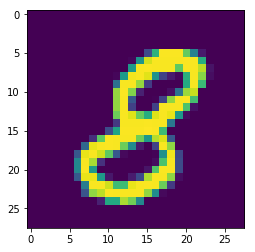

In [15]:
plt.imshow(mnist.train.images[5].reshape(28,28))

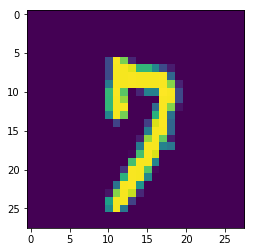

In [18]:
plt.imshow(mnist.train.images[25].reshape(28,28))

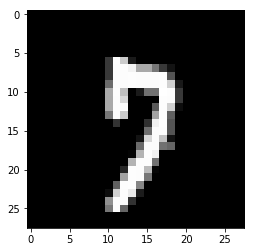

In [19]:
plt.imshow(mnist.train.images[25].reshape(28,28),cmap='gist_gray')

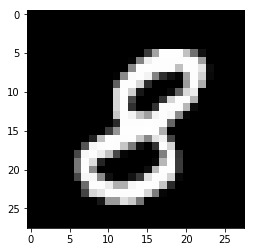

In [20]:
plt.imshow(mnist.train.images[5].reshape(28,28),cmap='gist_gray')

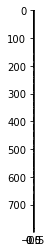

In [21]:
plt.imshow(mnist.train.images[5].reshape(784,1),cmap='gist_gray')

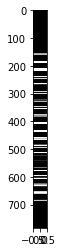

In [22]:
plt.imshow(mnist.train.images[5].reshape(784,1),cmap='gist_gray',aspect=0.02)

In [23]:
#Create the model
x = tf.placeholder(tf.float32,shape=[None,784])

In [24]:
W = tf.Variable(tf.zeros([784,10]))

In [25]:
b = tf.Variable(tf.zeros([10]))

In [26]:
y = tf.matmul(x,W) + b

In [28]:
#Loss and Optimizer
y_true = tf.placeholder(tf.float32,shape=[None,10])

In [29]:
#cross entropy
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

In [30]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [31]:
train = optimizer.minimize(cross_entropy)

In [32]:
#Create Session
init = tf.global_variables_initializer()

In [37]:
with tf.Session() as sess:
    sess.run(init)
    
    
    for step in range(1000):
        
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train,feed_dict={x:batch_x, y_true:batch_y})
        
        
        matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
        acc = tf.reduce_mean(tf.cast(matches,tf.float32))
        
        print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.1694
0.4071
0.4832
0.5609
0.5642
0.6844
0.7246
0.7672
0.7765
0.7456
0.7764
0.7716
0.756
0.762
0.787
0.7796
0.8459
0.8347
0.825
0.8215
0.8405
0.8082
0.8492
0.8469
0.8547
0.8511
0.8422
0.8596
0.8573
0.8722
0.8671
0.8683
0.8657
0.8674
0.8671
0.8529
0.8481
0.8741
0.8715
0.8745
0.8578
0.8559
0.8677
0.8728
0.8755
0.879
0.8746
0.8762
0.8785
0.8788
0.8737
0.8673
0.8737
0.8616
0.8844
0.8847
0.8688
0.8814
0.8751
0.8835
0.8814
0.8822
0.8865
0.8843
0.8884
0.8805
0.8839
0.8804
0.8646
0.8878
0.8713
0.8855
0.8912
0.8913
0.8869
0.8895
0.8813
0.8905
0.8886
0.8882
0.891
0.8855
0.89
0.8786
0.8918
0.8917
0.8877
0.889
0.8913
0.886
0.8749
0.8903
0.8824
0.8789
0.8942
0.8946
0.8948
0.8927
0.8891
0.8935
0.8915
0.8972
0.8965
0.8907
0.8947
0.8896
0.8913
0.8923
0.8991
0.8961
0.8967
0.892
0.8924
0.8922
0.8925
0.888
0.8909
0.8944
0.8944
0.891
0.8945
0.8962
0.8896
0.8922
0.898
0.8972
0.8933
0.895
0.8932
0.8955
0.8936
0.8994
0.8945
0.8977
0.8974
0.8913
0.8966
0.8992
0.9011
0.8962
0.8948
0.8945
0.8977
0.8987
0.8998
